In [24]:
# Import libaries
import re
import importlib


In [25]:
# Libary to import self-made libaries
import sys # https://stackoverflow.com/questions/4383571/importing-files-from-different-folder
sys.path.insert(1, r'C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\Brighway\Libaries')

In [194]:
# Importing self-made libaries
import standards as s
import Monte_Carlo as MC
import life_cycle_assessment as lc
import LCA_plots as lp
import box_plot as bp

# Reload to reset the state of the self-made libaries
# https://dev.to/fronkan/importlib-reload-for-resting-modules-between-tests-neh
importlib.reload(s)
importlib.reload(MC)
importlib.reload(lc)
importlib.reload(lp)
importlib.reload(bp)

<module 'box_plot' from 'C:\\Users\\ruw\\Desktop\\RA\\Single-use-vs-multi-use-in-health-care\\Brighway\\Libaries\\box_plot.py'>

In [27]:
# Specifying if it is CONSQ (consequential) or APOS
db_type = 'CONSQ'

# Specifying the LCIA method
lcia_method = 'recipe'


In [28]:

# Path to where the code is stored
path = r'C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\Brighway'

file_identifier = 'Ananas'
res_folder_identifier = 'Ofir'

# Specifying the file name and sheet name
file_name = f'{path}\Results\{file_identifier} - {db_type}_{lcia_method}.xlsx'
sheet_name = f'{file_identifier}'

# Creating the saving directory for the results
save_dir = s.results_folder(path, 'Results', res_folder_identifier)

# Let the use decide the project and database
database_project, database_name = lc.select_project_and_database()

# Creating the flow legend
flow_legend = ['H2R',
               'H2S',
               'ASC',
               'ASW',
               'H4R',
               'H4S',
               'ALC',
               'ALW'
               ]



Folder name Results created
The chosen project is SU_vs_MU and the chosen database is sterilization


In [29]:
flows = lc.get_database_type_flows(database_project, database_name, db_type)

flows

['H200 REC - CONSQ',
 'H200 SU - CONSQ',
 'H400 REC- CONSQ',
 'H400 SU - CONSQ',
 'alubox large + washer - CONSQ',
 'alubox large + wipe - CONSQ',
 'alubox small + washer - CONSQ',
 'alubox small + wipe - CONSQ']

In [30]:
# flows = lc.get_user_specific_flows(database_project, database_name)
# flows

In [31]:
initialization = [database_project, database_name, flows, lcia_method, db_type]
file_name_unique = f'{path}\Results\{file_identifier} - {db_type}_{lcia_method}_unq.xlsx'

In [32]:
# FU, FU_procces, impact_category, plot_x_axis = lc.LCA_initialization(database_project, database_name, flows, lcia_method, db_type)
# for x in FU:
#     for key, item in x.items():
#         print(key, item)

In [33]:
df, plot_x_axis_all, impact_categories, functional_unit = lc.quick_LCIA(initialization, file_name, file_name_unique, sheet_name)
functional_unit

Recipe is selected
Initialization is completed
DataFrame with nested lists written to Excel successfully.


[{'H200 REC - CONSQ': {'market for polypropylene, granulate' (kilogram, GLO, None): 0.07100000000000001}},
 {'H200 REC - CONSQ': {'sheet manufacturing - CONSQ' (kilogram, GLO, None): 0.07100000000000001}},
 {'H200 REC - CONSQ': {'packaging film production, low density polyethylene' (kilogram, RER, None): 0.007274827}},
 {'H200 REC - CONSQ': {'market for corrugated board box' (kilogram, RER, None): 0.00280226328}},
 {'H200 REC - CONSQ': {'autoclave - CONSQ' (unit, GLO, None): 0.08333333333333333}},
 {'H200 REC - CONSQ': {'transport Plastic - CONSQ' (ton kilometer, GLO, None): 0.00358228592}},
 {'H200 REC - CONSQ': {'market for polypropylene, granulate' (kilogram, GLO, None): -0.038340000000000006}},
 {'H200 REC - CONSQ': {'polyethylene, high density, granulate, recycled to generic market for high density PE granulate' (kilogram, Europe without Switzerland, None): -0.00392840658}},
 {'H200 REC - CONSQ': {'PP incineration no Energy Recovery - CONSQ' (kilogram, CH, None): -0.03266}},
 {'H2

In [34]:
rearrange = True
df_rearranged = lc.rearrange_dataframe_index(rearrange, df)

In [35]:
if 'recipe' in lcia_method:
    df_res, df_endpoint = lc.recipe_dataframe_split(df_rearranged)
    plot_x_axis_end = plot_x_axis_all[-3:]
    ic_mid = plot_x_axis_all[:-3] 
    plot_x_axis = []
    for ic in ic_mid:
        # print(ic)
        string = re.findall(r'\((.*?)\)', ic)
        plot_x_axis.append(string[0])

else:
    df_res = df_rearranged
    plot_x_axis = plot_x_axis_all


In [36]:
# if calculate_cont == True:
#     sub_proccess, amount = lc.obtaining_sub_process(sub_product_details)
#     FU_sub, FU_sub_process, idx = lc.sub_process_initilization(sub_proccess, FU, database_project, f'df_idx_ofir_{db_type}', lcia_method, db_type)
#     flow_count, flow_sub, functional_unit_sub = lc.FU_contibution_initilization(FU_sub, FU_sub_process)
#     fu_sub_updated = lc.process_update(FU, functional_unit_sub)
    
#     df_cont = lc.LCIA_contribution(impact_category[1], flow_count, FU_sub_process, fu_sub_updated, amount, idx)
#     lc.save_LCA_results(df_cont, file_cont_name, sheet_name, impact_category)
#     df_c = lc.import_LCA_results(file_cont_name, idx, impact_category[1])


In [199]:
df_tot, df_scaled = lc.dataframe_element_scaling(df_res)
df_col = [df_res.columns[1]]
df_GWP = df_res[df_col]

unique_elements = lc.unique_elements_list(database_name)
colors = s.plot_colors(unique_elements,'turbo')


inputs = [flow_legend, colors, save_dir, db_type, database_name]

In [38]:
df_tot[impact_categories[1]]

H200 REC - CONSQ                 0.436891
H200 SU - CONSQ                  0.518194
alubox small + washer - CONSQ    0.524675
alubox small + wipe - CONSQ      0.477101
H400 REC- CONSQ                  0.779571
H400 SU - CONSQ                  1.009075
alubox large + washer - CONSQ    0.832332
alubox large + wipe - CONSQ      0.704004
Name: (ReCiPe 2016 v1.03, midpoint (H), climate change, global warming potential (GWP1000)), dtype: object

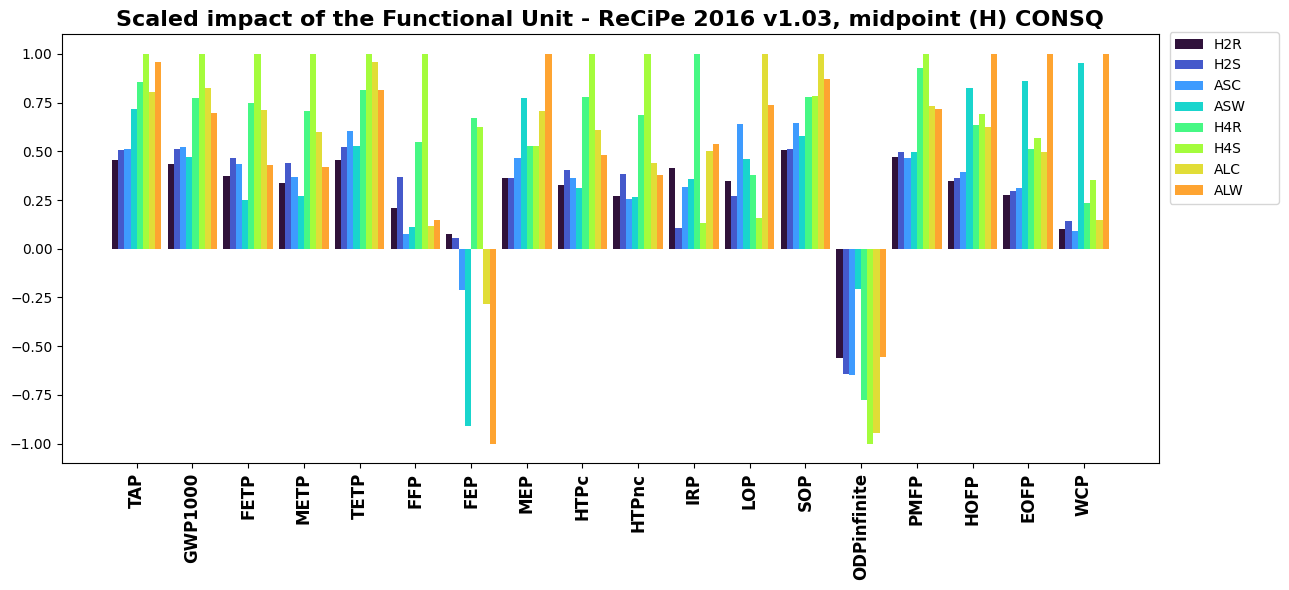

In [39]:
leg_pos_mid = .605

lp.scaled_FU_plot(df_scaled, plot_x_axis, inputs, impact_categories, leg_pos_mid)

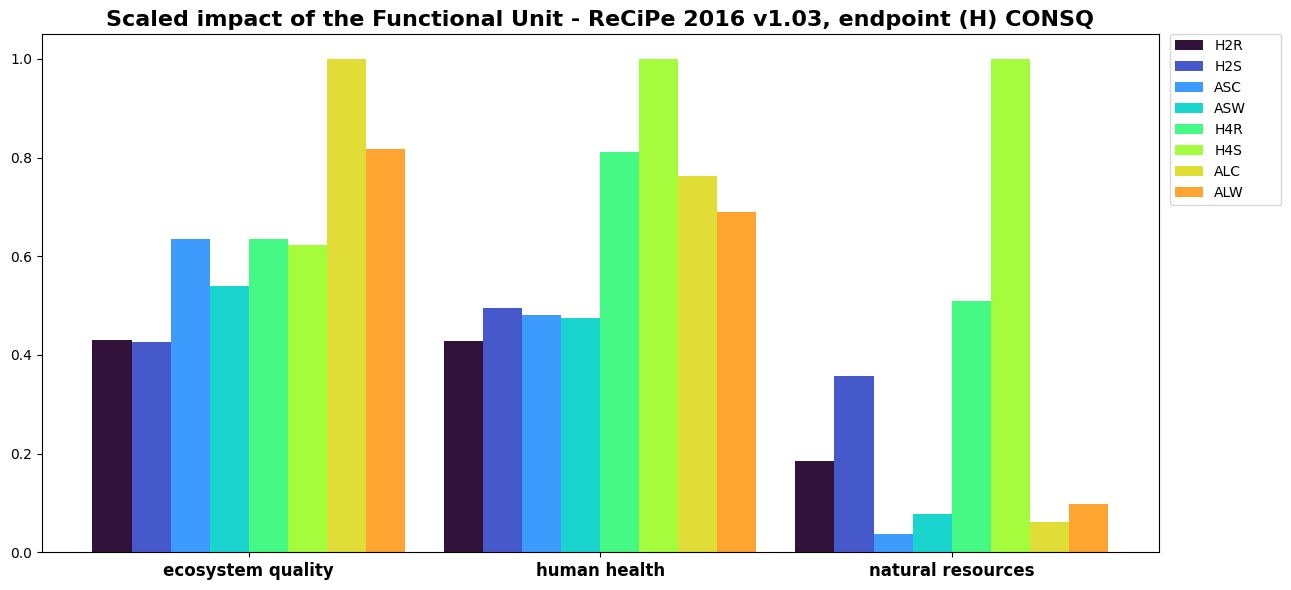

In [40]:
leg_pos_end = 0.67
if 'recipe' in lcia_method.lower():
    df_tot_e, df_scaled_e = lc.dataframe_element_scaling(df_endpoint)
    lp.scaled_FU_plot(df_scaled_e, plot_x_axis_end, inputs, impact_categories[-3:], leg_pos_end)


In [41]:
if 'recipe' not in lcia_method:
    directory = 'C:\\Users\\ruw\\Desktop\\RA\\'
    lp.single_score_plot(directory, df_tot, colors, flow_legend, save_dir, db_type)

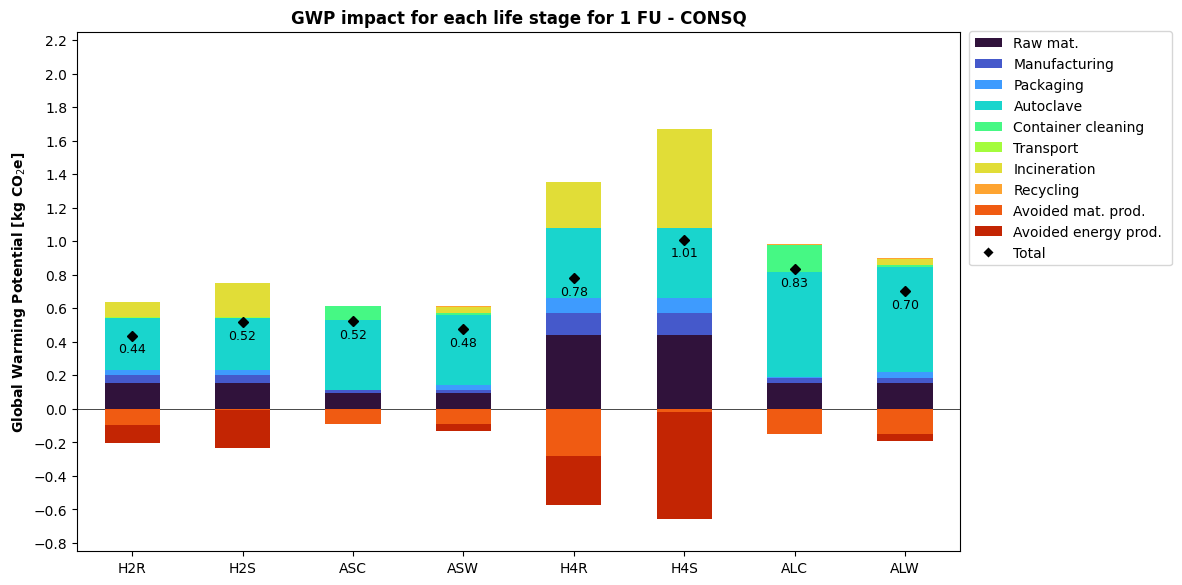

In [195]:

y_min = -0.8
y_max = 2.2
step = 0.2
leg_pos = 0.55
marker_offset = 0.12
y_axis_values = [y_min, y_max, step, leg_pos, marker_offset]
lp.gwp_scenario_plot(df_GWP, inputs, y_axis_values)


In [198]:
database_name

'sterilization'

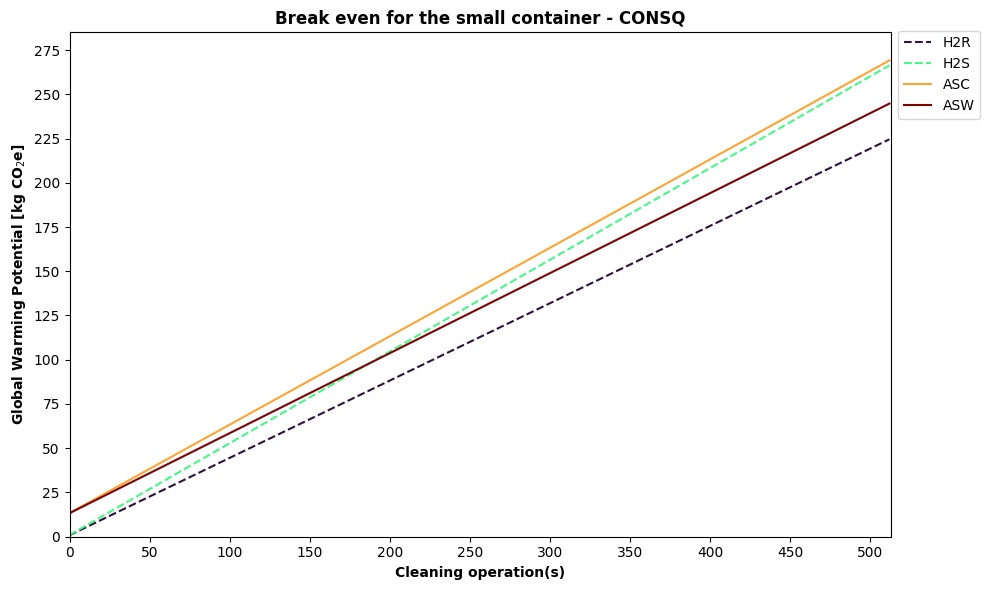

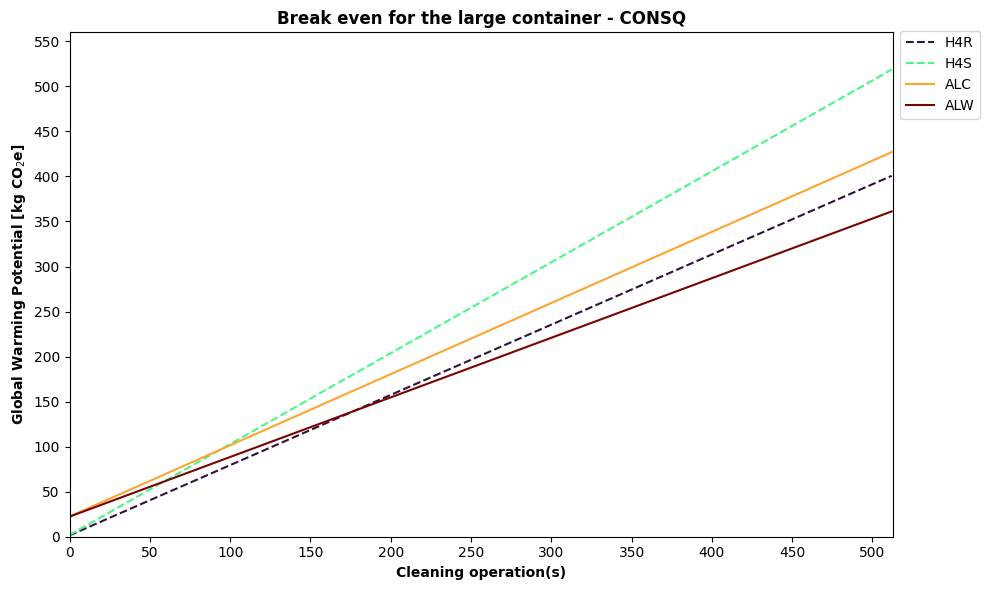

In [200]:
amount_of_uses = 513
y_max = [275, 550]
ystep = [25, 50]
xstep = 50
break_even_product = 'container'
color_idx = [0, 4, 7, 10]

plot_controls = [amount_of_uses, y_max, ystep, xstep, break_even_product, color_idx]
lp.break_even_graph(df_GWP, inputs, plot_controls)

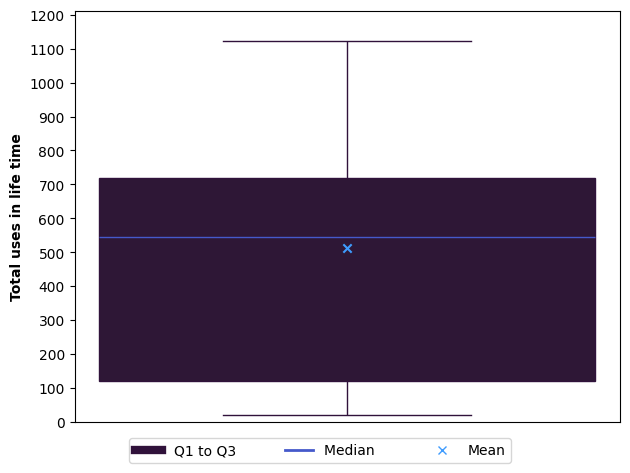

In [46]:
color_Q1_Q3 = 0
color_median = 1
color_mean = 2
plot_label = 'Total uses in life time'
save_name = 'alu_container'
leg_size = 0.7
y_min = 0
y_max = 1210
ystep = 100

path_box_plot = r"C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\Single-use-vs-multi-use-in-health-care\Data\container.xlsx"

plot_structure = [color_Q1_Q3, color_median, color_mean, plot_label, save_name, leg_size, y_min, y_max, ystep]

bp.box_plot(path_box_plot, inputs, plot_structure)